In [19]:
import numpy as np

def relu_function(x):
    return np.maximum(0, x)

b = 0.5
x = np.array([1, 2, 3, 4])
w = np.random.rand(4)

neuron_output = np.dot(x, w) + b
activation_function = relu_function(neuron_output)
print("Neuron output:", neuron_output)
print("Activation function output:", activation_function)

Neuron output: 2.117532779279763
Activation function output: 2.117532779279763


# Lab 1: Neural Network Fundamentals

This notebook introduces the basic building blocks of neural networks, progressing from a single neuron to multilayer perceptrons (MLPs).

## 1. Single Neuron with ReLU Activation

We start by implementing a single artificial neuron. The neuron computes a weighted sum of inputs, adds a bias, and applies a ReLU activation function.

**Mathematical formula:** `output = ReLU(w·x + b)`

where:
- `x` = input vector
- `w` = weight vector
- `b` = bias term
- `ReLU(z) = max(0, z)` = activation function

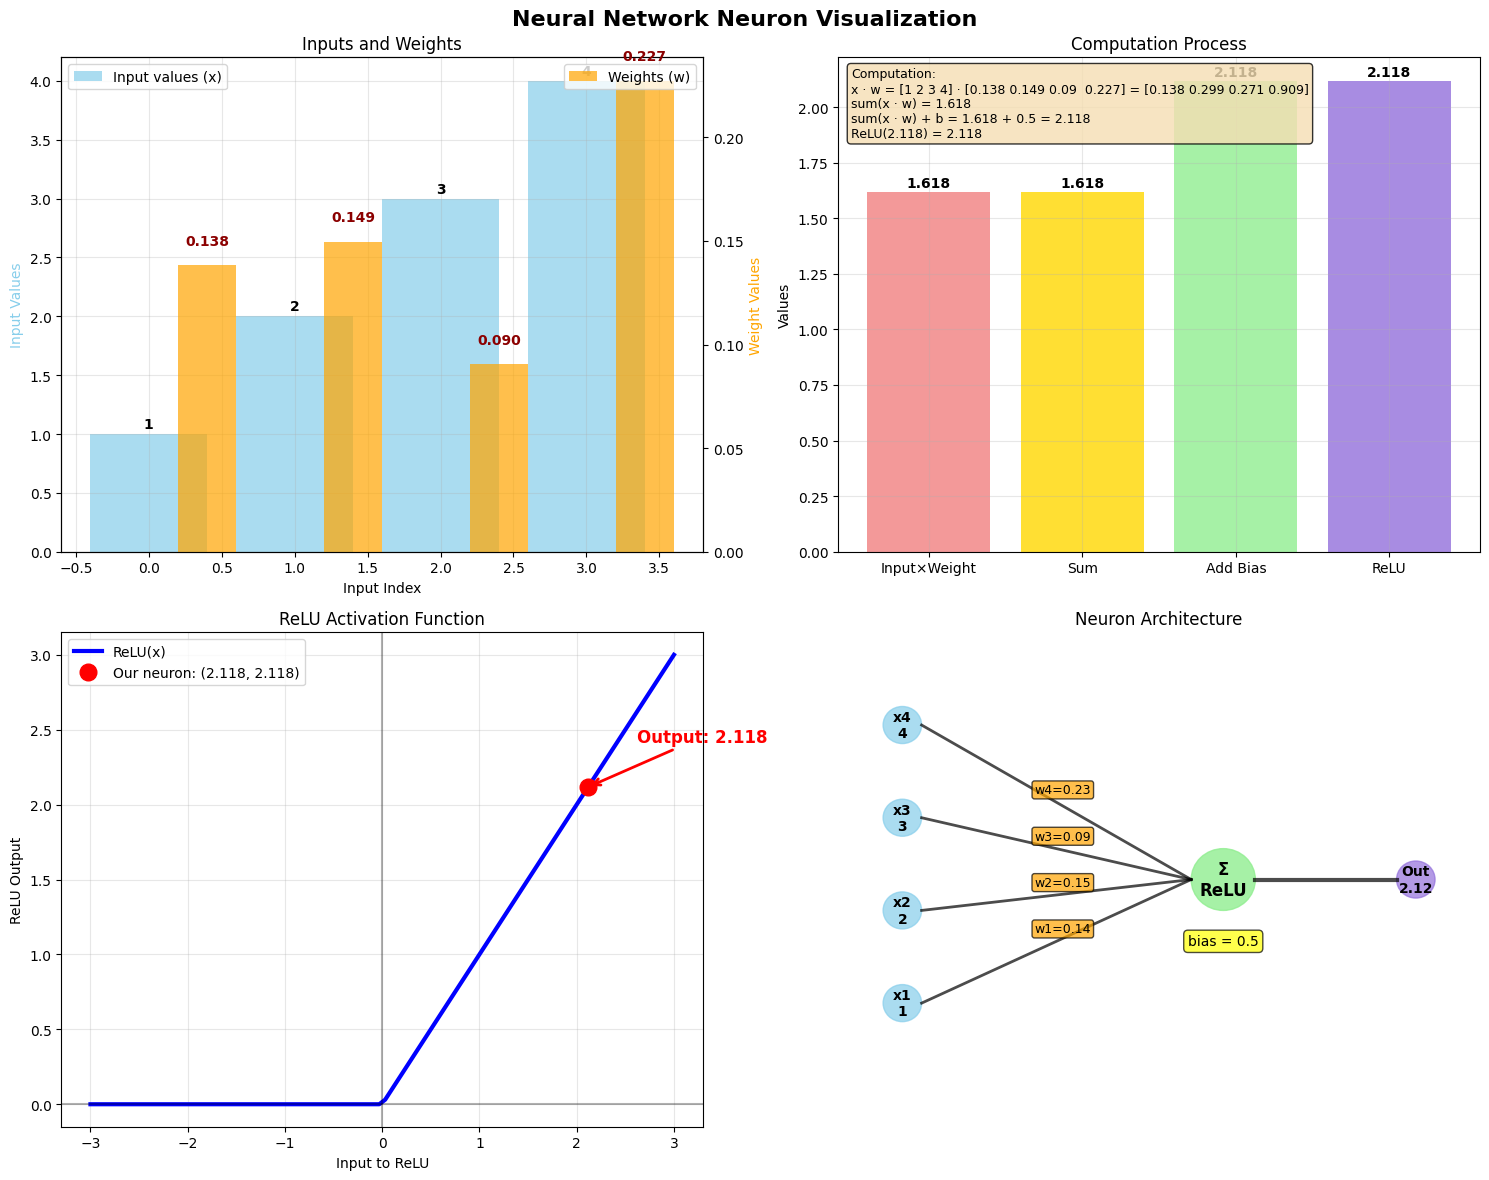


NEURAL NETWORK NEURON ANALYSIS
Inputs (x):           [1 2 3 4]
Weights (w):          [0.1383 0.1494 0.0904 0.2273]
Bias (b):             0.5
Weighted sum:         1.6175
Pre-activation:       2.1175
Post-activation:      2.1175
Activation function:  ReLU (Rectified Linear Unit)

Mathematical Formula:
output = ReLU(Σ(xi × wi) + b)
output = ReLU(1×0.138 + 2×0.149 + 3×0.090 + 4×0.227 + 0.5)
output = ReLU(2.1175) = 2.1175


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Neural Network Neuron Visualization', fontsize=16, fontweight='bold')

# 1. Input and Weight Visualization
ax1.bar(range(len(x)), x, alpha=0.7, color='skyblue', label='Input values (x)')
ax1_twin = ax1.twinx()
ax1_twin.bar([i+0.4 for i in range(len(w))], w, alpha=0.7, color='orange', width=0.4, label='Weights (w)')
ax1.set_xlabel('Input Index')
ax1.set_ylabel('Input Values', color='skyblue')
ax1_twin.set_ylabel('Weight Values', color='orange')
ax1.set_title('Inputs and Weights')
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, (inp, weight) in enumerate(zip(x, w)):
    ax1.text(i, inp+0.05, f'{inp}', ha='center', fontweight='bold')
    ax1_twin.text(i+0.4, weight+0.01, f'{weight:.3f}', ha='center', fontweight='bold', color='darkred')

# 2. Computation Process Visualization
computation_steps = ['Input×Weight', 'Sum', 'Add Bias', 'ReLU']
values = [np.sum(x * w), np.sum(x * w), neuron_output, activation_function]
colors = ['lightcoral', 'gold', 'lightgreen', 'mediumpurple']

bars = ax2.bar(computation_steps, values, color=colors, alpha=0.8)
ax2.set_title('Computation Process')
ax2.set_ylabel('Values')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, val in zip(bars, values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# Add computation details
textstr = f'Computation:\n'
textstr += f'x · w = {x} · {w.round(3)} = {(x * w).round(3)}\n'
textstr += f'sum(x · w) = {np.sum(x * w):.3f}\n'
textstr += f'sum(x · w) + b = {np.sum(x * w):.3f} + {b} = {neuron_output:.3f}\n'
textstr += f'ReLU({neuron_output:.3f}) = {activation_function:.3f}'
ax2.text(0.02, 0.98, textstr, transform=ax2.transAxes, fontsize=9, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 3. ReLU Activation Function Visualization
x_range = np.linspace(-3, 3, 100)
relu_output = np.maximum(0, x_range)

ax3.plot(x_range, relu_output, 'b-', linewidth=3, label='ReLU(x)')
ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax3.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Highlight our specific neuron output
ax3.plot(neuron_output, activation_function, 'ro', markersize=12, 
         label=f'Our neuron: ({neuron_output:.3f}, {activation_function:.3f})')
ax3.annotate(f'Output: {activation_function:.3f}', 
             xy=(neuron_output, activation_function), 
             xytext=(neuron_output+0.5, activation_function+0.3),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=12, fontweight='bold', color='red')

ax3.set_xlabel('Input to ReLU')
ax3.set_ylabel('ReLU Output')
ax3.set_title('ReLU Activation Function')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Network Architecture Diagram
ax4.set_xlim(0, 10)
ax4.set_ylim(0, 8)
ax4.axis('off')
ax4.set_title('Neuron Architecture')

# Draw input nodes
input_positions = [(1, i*1.5 + 2) for i in range(len(x))]
for i, (pos, val) in enumerate(zip(input_positions, x)):
    circle = plt.Circle(pos, 0.3, color='skyblue', alpha=0.7)
    ax4.add_patch(circle)
    ax4.text(pos[0], pos[1], f'x{i+1}\n{val}', ha='center', va='center', fontweight='bold')

# Draw neuron
neuron_pos = (6, 4)
neuron_circle = plt.Circle(neuron_pos, 0.5, color='lightgreen', alpha=0.8)
ax4.add_patch(neuron_circle)
ax4.text(neuron_pos[0], neuron_pos[1], 'Σ\nReLU', ha='center', va='center', fontweight='bold', fontsize=12)

# Draw connections with weights
for i, (inp_pos, weight) in enumerate(zip(input_positions, w)):
    ax4.plot([inp_pos[0]+0.3, neuron_pos[0]-0.5], [inp_pos[1], neuron_pos[1]], 
             'k-', linewidth=2, alpha=0.7)
    # Weight labels
    mid_x = (inp_pos[0] + neuron_pos[0]) / 2
    mid_y = (inp_pos[1] + neuron_pos[1]) / 2
    ax4.text(mid_x, mid_y+0.2, f'w{i+1}={weight:.2f}', ha='center', va='center', 
             fontsize=9, bbox=dict(boxstyle='round,pad=0.2', facecolor='orange', alpha=0.7))

# Draw bias
ax4.text(neuron_pos[0], neuron_pos[1]-1, f'bias = {b}', ha='center', va='center', 
         fontsize=10, bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Draw output
output_pos = (9, 4)
output_circle = plt.Circle(output_pos, 0.3, color='mediumpurple', alpha=0.7)
ax4.add_patch(output_circle)
ax4.text(output_pos[0], output_pos[1], f'Out\n{activation_function:.2f}', ha='center', va='center', fontweight='bold')

# Output connection
ax4.plot([neuron_pos[0]+0.5, output_pos[0]-0.3], [neuron_pos[1], output_pos[1]], 
         'k-', linewidth=3, alpha=0.7)

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "="*60)
print("NEURAL NETWORK NEURON ANALYSIS")
print("="*60)
print(f"Inputs (x):           {x}")
print(f"Weights (w):          {w.round(4)}")
print(f"Bias (b):             {b}")
print(f"Weighted sum:         {np.sum(x * w):.4f}")
print(f"Pre-activation:       {neuron_output:.4f}")
print(f"Post-activation:      {activation_function:.4f}")
print(f"Activation function:  ReLU (Rectified Linear Unit)")
print("\nMathematical Formula:")
print(f"output = ReLU(Σ(xi × wi) + b)")
print(f"output = ReLU({x[0]}×{w[0]:.3f} + {x[1]}×{w[1]:.3f} + {x[2]}×{w[2]:.3f} + {x[3]}×{w[3]:.3f} + {b})")
print(f"output = ReLU({neuron_output:.4f}) = {activation_function:.4f}")

### Visualizing a Single Neuron

The following visualization shows:
1. Input values and corresponding weights
2. Step-by-step computation process
3. ReLU activation function behavior
4. Network architecture diagram

MLP Architecture: 4 -> 6 -> 4 -> 2
Input: [1 2 3 4]
Hidden Layer 1 output: [0.    0.257 0.    0.676 0.622 1.862]
Hidden Layer 2 output: [0.    0.    0.    1.337]
Final Output: [0.811 0.339]


MLP Architecture: 4 -> 6 -> 4 -> 2
Input: [1 2 3 4]
Hidden Layer 1 output: [0.    0.257 0.    0.676 0.622 1.862]
Hidden Layer 2 output: [0.    0.    0.    1.337]
Final Output: [0.811 0.339]


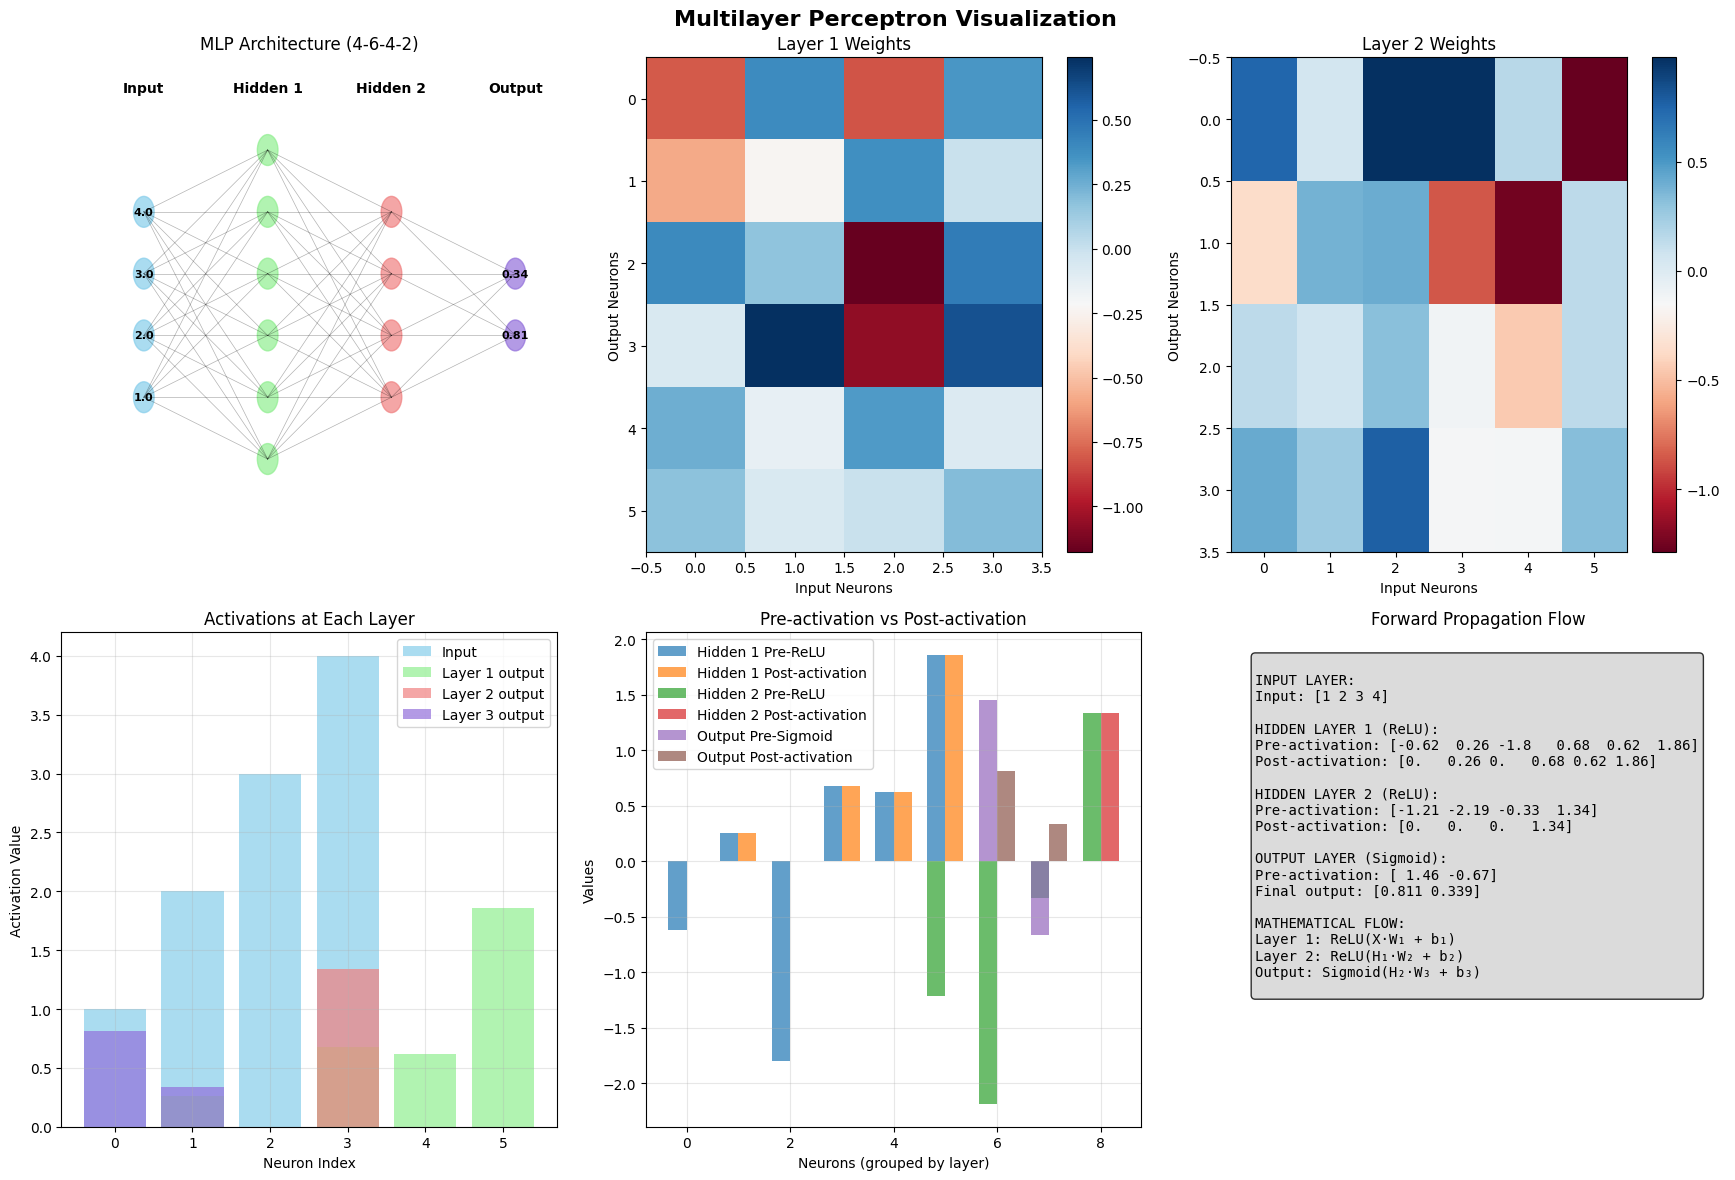


MULTILAYER PERCEPTRON ANALYSIS
Architecture: 4 → 6 → 4 → 2
Total parameters: 68

Layer Details:
  Layer 1: 4 → 6 neurons
    Weights shape: (4, 6)
    Biases shape: (6,)
    Activation: ReLU
  Layer 2: 6 → 4 neurons
    Weights shape: (6, 4)
    Biases shape: (4,)
    Activation: ReLU
  Layer 3: 4 → 2 neurons
    Weights shape: (4, 2)
    Biases shape: (2,)
    Activation: Sigmoid

Data Flow:
  Input → Hidden1: (4,) → (6,)
  Hidden1 → Hidden2: (6,) → (4,)
  Hidden2 → Output: (4,) → (2,)

Key Differences from Single Neuron:
  - Multiple layers allow complex pattern recognition
  - Hidden layers extract hierarchical features
  - Non-linear activations enable complex mappings
  - More parameters = higher model capacity


In [22]:
# Multilayer Perceptron (MLP) Implementation
import numpy as np
import matplotlib.pyplot as plt

class MultilayerPerceptron:
    def __init__(self, input_size, hidden_sizes, output_size):
        """
        Initialize MLP with given architecture
        input_size: number of input features
        hidden_sizes: list of hidden layer sizes [h1, h2, ...]
        output_size: number of output neurons
        """
        self.layers = []
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        
        # Initialize weights and biases for each layer
        for i in range(len(layer_sizes) - 1):
            layer = {
                'weights': np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.5,
                'biases': np.random.randn(layer_sizes[i+1]) * 0.5,
                'type': 'hidden' if i < len(layer_sizes) - 2 else 'output'
            }
            self.layers.append(layer)
    
    def relu(self, x):
        """ReLU activation function"""
        return np.maximum(0, x)
    
    def sigmoid(self, x):
        """Sigmoid activation function for output layer"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow
    
    def forward_propagation(self, x):
        """Forward pass through the network"""
        self.activations = [x]  # Store activations for visualization
        self.pre_activations = []  # Store pre-activation values
        
        current_input = x
        
        for i, layer in enumerate(self.layers):
            # Linear transformation: z = Wx + b
            z = np.dot(current_input, layer['weights']) + layer['biases']
            self.pre_activations.append(z)
            
            # Apply activation function
            if layer['type'] == 'hidden':
                a = self.relu(z)  # ReLU for hidden layers
            else:
                a = self.sigmoid(z)  # Sigmoid for output layer
            
            self.activations.append(a)
            current_input = a
        
        return current_input

# Create MLP architecture: 4 inputs -> 6 hidden -> 4 hidden -> 2 outputs
mlp = MultilayerPerceptron(input_size=4, hidden_sizes=[6, 4], output_size=2)

# Use the same input as before
x_input = np.array([1, 2, 3, 4])
print("MLP Architecture: 4 -> 6 -> 4 -> 2")
print("="*50)

# Forward pass
output = mlp.forward_propagation(x_input)

print(f"Input: {x_input}")
print(f"Hidden Layer 1 output: {mlp.activations[1].round(3)}")
print(f"Hidden Layer 2 output: {mlp.activations[2].round(3)}")
print(f"Final Output: {output.round(3)}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Multilayer Perceptron Visualization', fontsize=16, fontweight='bold')

# 1. Network Architecture
ax = axes[0, 0]
ax.set_xlim(0, 12)
ax.set_ylim(0, 8)
ax.axis('off')
ax.set_title('MLP Architecture (4-6-4-2)')

# Layer positions
layer_x_positions = [2, 5, 8, 11]
layer_sizes = [4, 6, 4, 2]
layer_colors = ['skyblue', 'lightgreen', 'lightcoral', 'mediumpurple']
layer_names = ['Input', 'Hidden 1', 'Hidden 2', 'Output']

# Draw neurons for each layer
neuron_positions = []
for layer_idx, (x_pos, size, color, name) in enumerate(zip(layer_x_positions, layer_sizes, layer_colors, layer_names)):
    positions = []
    y_start = 4 - (size - 1) * 0.5
    
    for neuron_idx in range(size):
        y_pos = y_start + neuron_idx * 1
        positions.append((x_pos, y_pos))
        
        circle = plt.Circle((x_pos, y_pos), 0.25, color=color, alpha=0.7)
        ax.add_patch(circle)
        
        # Add values for input and output layers
        if layer_idx == 0:  # Input layer
            ax.text(x_pos, y_pos, f'{x_input[neuron_idx]:.1f}', ha='center', va='center', fontweight='bold', fontsize=8)
        elif layer_idx == len(layer_sizes) - 1:  # Output layer
            ax.text(x_pos, y_pos, f'{output[neuron_idx]:.2f}', ha='center', va='center', fontweight='bold', fontsize=8)
    
    neuron_positions.append(positions)
    
    ax.text(x_pos, 7.5, name, ha='center', va='center', fontweight='bold', fontsize=10)

for layer_idx in range(len(neuron_positions) - 1):
    for start_pos in neuron_positions[layer_idx]:
        for end_pos in neuron_positions[layer_idx + 1]:
            ax.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 
                   'k-', alpha=0.3, linewidth=0.5)

for i, layer in enumerate(mlp.layers):
    if i < 2: 
        ax = axes[0, i+1]
        im = ax.imshow(layer['weights'].T, cmap='RdBu', aspect='auto')
        ax.set_title(f'Layer {i+1} Weights')
        ax.set_xlabel('Input Neurons')
        ax.set_ylabel('Output Neurons')
        plt.colorbar(im, ax=ax)

# 3. Activations at each layer
ax = axes[1, 0]
for i, activation in enumerate(mlp.activations):
    if i == 0:
        ax.bar(range(len(activation)), activation, alpha=0.7, 
               label=f'Input', color='skyblue')
    else:
        ax.bar(range(len(activation)), activation, alpha=0.7, 
               label=f'Layer {i} output', 
               color=['lightgreen', 'lightcoral', 'mediumpurple'][i-1])

ax.set_title('Activations at Each Layer')
ax.set_xlabel('Neuron Index')
ax.set_ylabel('Activation Value')
ax.legend()
ax.grid(True, alpha=0.3)

# 4. Pre-activation vs Post-activation comparison
ax = axes[1, 1]
layer_names_short = ['Hidden 1', 'Hidden 2', 'Output']
for i, (pre_act, post_act) in enumerate(zip(mlp.pre_activations, mlp.activations[1:])):
    x_pos = np.arange(len(pre_act)) + i * (len(pre_act) + 1)
    width = 0.35
    
    ax.bar(x_pos - width/2, pre_act, width, alpha=0.7, 
           label=f'{layer_names_short[i]} Pre-ReLU' if i < 2 else f'{layer_names_short[i]} Pre-Sigmoid')
    ax.bar(x_pos + width/2, post_act, width, alpha=0.7, 
           label=f'{layer_names_short[i]} Post-activation')

ax.set_title('Pre-activation vs Post-activation')
ax.set_xlabel('Neurons (grouped by layer)')
ax.set_ylabel('Values')
ax.legend()
ax.grid(True, alpha=0.3)

# 5. Forward propagation flow
ax = axes[1, 2]
ax.axis('off')
ax.set_title('Forward Propagation Flow')

flow_text = f"""
INPUT LAYER:
Input: {x_input}

HIDDEN LAYER 1 (ReLU):
Pre-activation: {mlp.pre_activations[0].round(2)}
Post-activation: {mlp.activations[1].round(2)}

HIDDEN LAYER 2 (ReLU):
Pre-activation: {mlp.pre_activations[1].round(2)}
Post-activation: {mlp.activations[2].round(2)}

OUTPUT LAYER (Sigmoid):
Pre-activation: {mlp.pre_activations[2].round(2)}
Final output: {output.round(3)}

MATHEMATICAL FLOW:
Layer 1: ReLU(X·W₁ + b₁)
Layer 2: ReLU(H₁·W₂ + b₂)
Output: Sigmoid(H₂·W₃ + b₃)
"""

ax.text(0.05, 0.95, flow_text, transform=ax.transAxes, fontsize=10, 
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# Detailed analysis
print("\n" + "="*60)
print("MULTILAYER PERCEPTRON ANALYSIS")
print("="*60)
print(f"Architecture: {len(x_input)} → {' → '.join(map(str, [6, 4]))} → {len(output)}")
print(f"Total parameters: {sum(layer['weights'].size + layer['biases'].size for layer in mlp.layers)}")
print("\nLayer Details:")
for i, layer in enumerate(mlp.layers):
    print(f"  Layer {i+1}: {layer['weights'].shape[0]} → {layer['weights'].shape[1]} neurons")
    print(f"    Weights shape: {layer['weights'].shape}")
    print(f"    Biases shape: {layer['biases'].shape}")
    print(f"    Activation: {'ReLU' if layer['type'] == 'hidden' else 'Sigmoid'}")

print(f"\nData Flow:")
print(f"  Input → Hidden1: {x_input.shape} → {mlp.activations[1].shape}")
print(f"  Hidden1 → Hidden2: {mlp.activations[1].shape} → {mlp.activations[2].shape}")
print(f"  Hidden2 → Output: {mlp.activations[2].shape} → {output.shape}")

print(f"\nKey Differences from Single Neuron:")
print(f"  - Multiple layers allow complex pattern recognition")
print(f"  - Hidden layers extract hierarchical features")
print(f"  - Non-linear activations enable complex mappings")
print(f"  - More parameters = higher model capacity")

## 2. Multilayer Perceptron (MLP) Implementation

Now we extend the concept to multiple layers, creating a deep neural network. This MLP implementation includes:
- **Architecture:** 4 input neurons → 6 hidden → 4 hidden → 2 output neurons
- **Hidden layer activation:** ReLU (prevents vanishing gradients)
- **Output layer activation:** Sigmoid (for normalized outputs between 0 and 1)

This demonstrates how stacking layers enables the network to learn complex, hierarchical patterns.

In [56]:
x = np.random.random(4)
b = np.random.random(3)
W = np.random.random((3, 4))
y = relu_function(W @ x + b)
b2 = np.random.random(1)
W2 = np.random.random((1, 3))
print(y.shape)
y2 = relu_function(W2 @ y + b2)


(3,)


## 3. Simple 2-Layer Network Example

A minimal example showing how matrix operations enable efficient computation:
- Layer 1: 4 inputs → 3 hidden neurons
- Layer 2: 3 hidden neurons → 1 output neuron

In [78]:
print('Number of params: ', np.sum(b.shape) + np.prod(W.shape) + np.sum(b2.shape) + np.prod(W2.shape))

Number of params:  19


### Counting Parameters

Understanding model complexity: each weight and bias is a learnable parameter.

## Diabetes

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MLPRegressor(hidden_layer_sizes=(4, 3), activation='relu', solver='adam', max_iter=1000, random_state=42)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Test R^2 score: {test_score:.4f}')

Test R^2 score: -3.8584


/home/mgazda/Projects/nn_labs/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## 4. Real-World Application: Diabetes Dataset

Using scikit-learn's MLPRegressor on the diabetes dataset to predict disease progression.

**Task:** Regression (predicting continuous values)  
**Architecture:** 10 inputs → 4 hidden → 3 hidden → 1 output  
**Dataset:** 442 samples with 10 physiological features